# Simple Linear Regression

Consider $n$ points $(x_{1},y_{1}), (x_{2},y_{2}),\ldots, (x_{n},y_{n})$
on the euclidean plane. We call these $n$ points a *cloud* of points.

These points are often the result of measurements (pairs) on different units
or individuals. Think of $(x,y) = ($height,weight$)$
measured for different people, or $(x,y) = ($fertilizer,yield$)$ 
for different plots of land.

Here is a simple example with $n=7$ points:

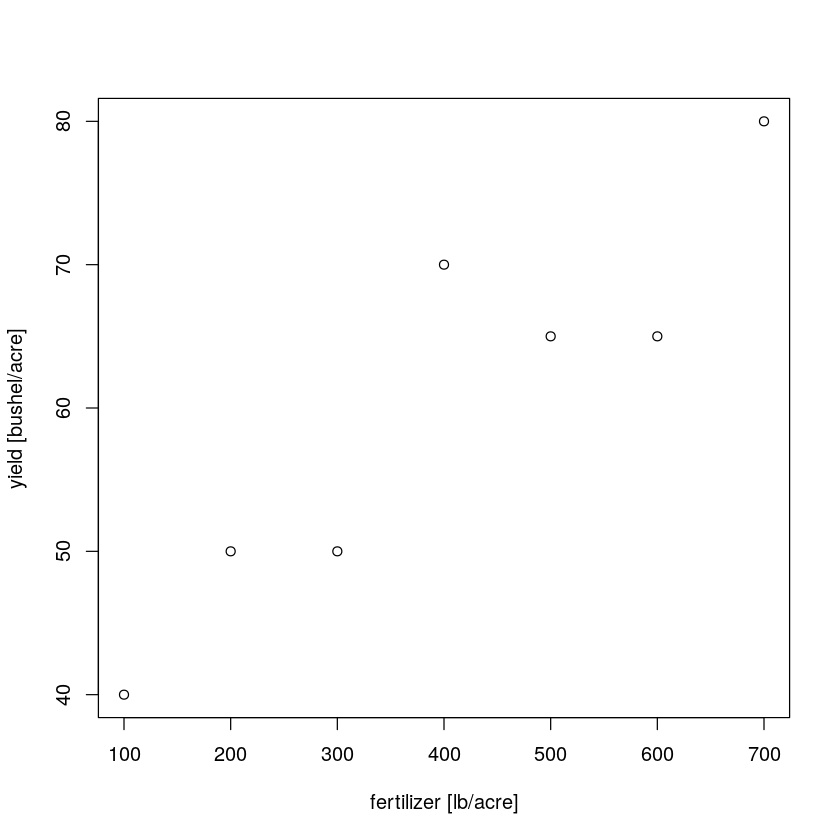

In [4]:
df <- data.frame(x=seq(100,700,100),y=c(40,50,50,70,65,65,80))
names(df) <- c("fertilizer [lb/acre]","yield [bushel/acre]")
plot(df)

It seems clear from the scatterplot of the seven points above, that
the more fertilizer we add to the land the more yield we get,
but not always. 

In this example we get the same yield of
50 bushels per acre when we add 200 or 300 pounds per acre
of fertilizer. 

Nevertheless a search for a straight line that
best *fits* these points seems justified by the picture.

What we mean by **best fit** however is a choice with many
different reasonable possibilites.

It all depends on what we mean by the distance of a given straight
line on the $xy$-plane: 

$y = a+bx$ say, to the cloud of points: 

$C = \{(x_{1},y_{1}),\ldots,(x_{n},y_{n})\}.$

Simple linear regression looks for the line of best fit
according to the criterion called: *Ordinary Least Squares*.

$$D(a,b) = D(a,b;C) = |y-a-bx| = \sqrt{\sum_{i=1}^{n} (y_{i} - a -b x_{i})^{2}}$$

This is simply the euclidean distance between the observed vector,

$\begin{align}
    y &= \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix}
  \end{align}
$

and what it would be predicted with the straight line $y=f(x)=a+bx$,

$$
\begin{align}
   f(x) &= \begin{bmatrix}
           a + b x_{1} \\
           a + b x_{2} \\
           \vdots \\
           a + b x_{n}
         \end{bmatrix}
         \\
&= a
\begin{bmatrix}
           {1} \\
           {1} \\
           \vdots \\
           {1}
         \end{bmatrix}
  + b
\begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
         \\
 &= \begin{bmatrix}
     1 & x_{1} \\
     1 & x_{2} \\
     \vdots & \vdots \\
     1 & x_{n} 
     \end{bmatrix}
  \begin{bmatrix}
      a \\
      b
      \end{bmatrix}
      \\
 &= X \beta
 \\
 &= a + b x
\end{align}
$$

Notice the multiple ways of writing the vector of predicted y values with the linear model!.

It is easy to get the *best OLS* fit with R:

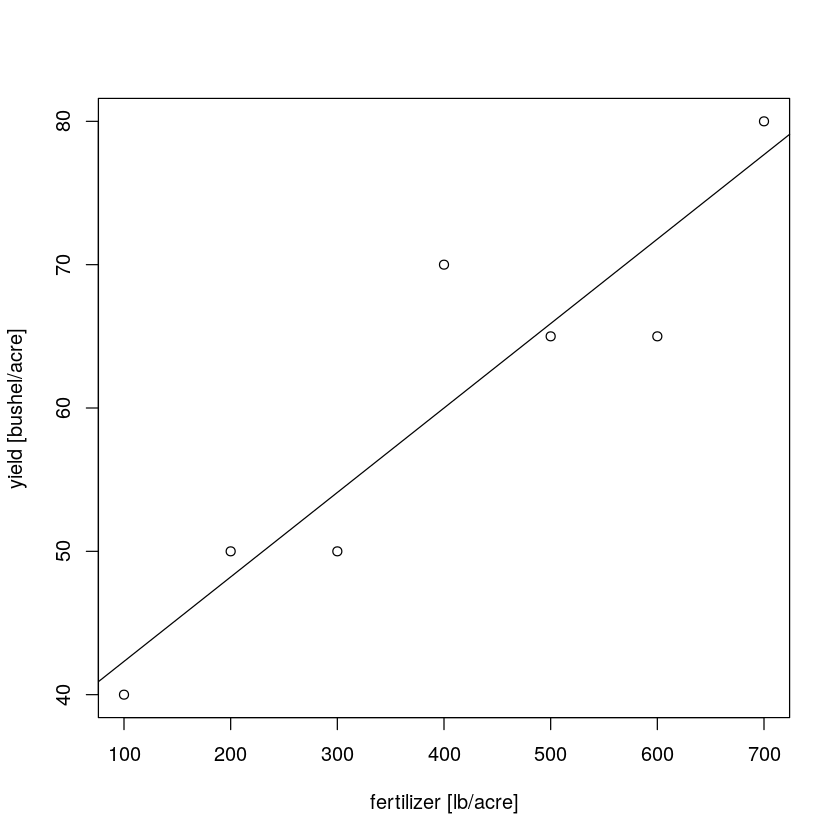

In [10]:
x <- df$fert
y <- df$yi

lm0 <- lm(y~x,data=df)

plot(df)
abline(lm0)

## The Regression Line

The values of $a$ (the $y$-intercept of the straight line)
and $b$ (the slope of the straight line) that produce 
the *best fit* according to the OLS distance criterion
are not difficult to obtain. The solution is:

$$\hat{b} = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}
{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}
$$

and,

$$ \hat{a} = \bar{y}-\hat{b} \bar{x} $$

Using calculus, it is just a matter of taking
the partial derivatives of $D^{2}(a,b)$ 
(better to square it to get rid of the pesky square root) w.r.t. 
$a$ and $b$ and setting them equal to zero.
That gives you a system of two linear equations and two
unknowns. The solution is shown above.

Geometry gives a much more beatiful explanation that also
extends to multiple regression and beyond.

Just notice that $\sum (x_{i}-\bar{x}) = \sum (y_{i}-\bar{y}) = 0$.

Hence, for any value of $b$ the vector $ v = (y-\bar{y}) - b (x-\bar{x}) $ is perpendicular
to any constant vector, i.e. any vector with all the $n$ components equal 
to the same value.

The vector $c$ with all its entries equal to the constant value: $\bar{y}-a-b\bar{x}$ 
is therefore $\perp$ (perpendicular) to the above vector $v$.

By the theorem of Pythagoras we have:

$$|v+c|^{2} = |v|^{2} + |c|^{2}$$

Thus,

$$ D(a,b) = |v+c| \ge |v| = D(\bar{y}-b\bar{x},b) $$

This confirms the fact that any candidate straight line $y=a+bx$
can be improved (gets closer to the cloud) by moving it parallel
to itself so that is goes through the center of the cloud, i.e.
through the point of averages $(\bar{x},\bar{y})$.

Since we now know that the best line must go through $(\bar{x},\bar{y})$
we only need to look for the slope $b$.

Without loss of generality (w.l.o.g) we can assume the origin is right at
the center of the cloud (i.e. that $\bar{x} = \bar{y} = 0$) and
$D(a,b) = D(0,b) = D(b) = |y-bx|$.

The best slope will be the $\hat{b}$ that makes the vector of errors $e=(y-\hat{b} x)$
$\perp$ to the vector $x$.

This is again a straight forward consequence of the holy Pythagorean theorem:

$$ |y-bx|^{2} = |(y-\hat{b}x) + (\hat{b}-b)x|^{2} = |e|^{2} + (\hat{b}-b)^{2} |x|^{2} \ge |e|^{2} $$

In other words,

$$ D(b) \ge D(\hat{b})$$

with equality, when and only when $b=\hat{b}$.

So here is the condition for best fit:

$$ (y-\hat{b}x) \ \perp\ x \ \ \Leftrightarrow \ x^{t} (y-\hat{b}x) = 0 $$

Thus, provided that $x^{t}x$ is nonsingular, we finally obtain:

$$ \hat{b} = (x^{t}x)^{-1} x^{t} y $$

Remembering that we have assumed the origin at the center of the cloud we get,

$$ \hat{b} = \frac{\sum_{i}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i}(x_{i}-\bar{x})^{2}} = 
 \frac{\sum_{i} (x_{i}-\bar{x}) y_{i}}{\sum_{i} (x_{i}-\bar{x})^{2}} = 
 \sum_{i=1}^{n} w_{i} y_{i} = 
 \frac{\mbox{cov}(x,y)}{\mbox{var}(x)} = 
 \mbox{cor}(x,y) \frac{\mbox{sd}(y)}{\mbox{sd}(x)} $$
 
 where the weights $w_{i} = (x_{i}-\bar{x})/\sum (x_{j}-\bar{x})^{2}$ are such that,
 
 $$ \sum_{i=1}^{n} w_{i} = 0 \ \ \mbox{and}\ \  \sum_{i=1}^{n} w^{2}_{i} = \frac{1}{\sum_{i} (x_{i}-\bar{x})^{2}} 
  = \frac{n}{\mbox{var}(x)}$$

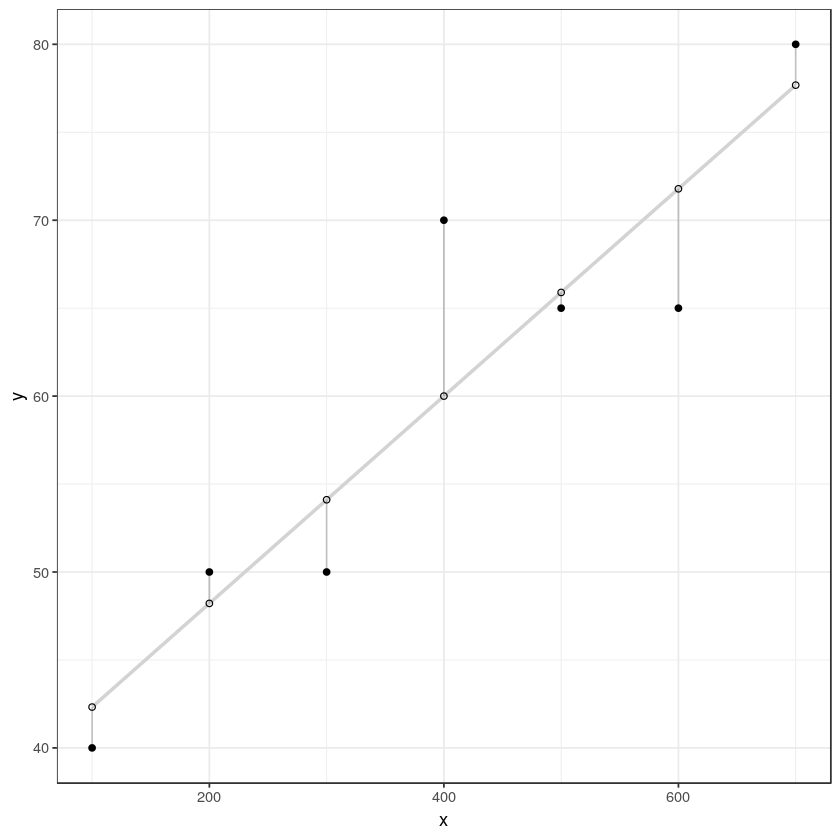

In [4]:
library(ggplot2)
df$predicted <- predict(lm0)
df$residuals <- residuals(lm0)
ggplot(df, aes(x = x, y = y)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_segment(aes(xend = x, yend = predicted), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()  # Add theme for cleaner look

In [5]:
sum(df$res[df$res>0])

[1] 14.10714

In [6]:
sum(df$res[df$res<0])

[1] -14.10714

In [7]:
round(var(df$predicted)/var(df$y),2)

[1] 0.85

In [8]:
r <- cor(x,y)
c(round(r,2),round(r^2,2))

[1] 0.92 0.85

In [9]:
round(cor(df$y,df$p),2)

[1] 0.92

In [10]:
round(cor(df$y,df$p),2)

[1] 0.92

In [11]:
SD <- function(x) sqrt(mean((x-mean(x))^2))
round(SD(df$res),2)

[1] 5.04

In [12]:
round(sqrt(1-r^2)*SD(y),2)

[1] 5.04

In [13]:
lm0


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
   36.42857      0.05893  


In [14]:
summary(lm0)


Call:
lm(formula = y ~ x, data = df)

Residuals:
      1       2       3       4       5       6       7 
-2.3214  1.7857 -4.1071 10.0000 -0.8929 -6.7857  2.3214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.42857    5.03812   7.231 0.000789 ***
x            0.05893    0.01127   5.231 0.003379 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.961 on 5 degrees of freedom
Multiple R-squared:  0.8455,	Adjusted R-squared:  0.8146 
F-statistic: 27.36 on 1 and 5 DF,  p-value: 0.003379


In [15]:
bhat <- cov(x,y)/var(x)
round(bhat,2)

[1] 0.06

In [16]:
ahat <- mean(y) - bhat*mean(x)
round(ahat,2)

[1] 36.43

In [17]:
round(r*sd(y)/sd(x),2)

[1] 0.06

In [18]:
ptaves = function(mx = mean(x),my = mean(y)) {
	abline(v=mx,col="red")
	abline(h=my,col="red")
}

sdline = function(mx=mean(x),my=mean(y),sx=sd(x),sy=sd(y),r=cor(x,y)) {
	b = (sy/sx)*sign(r)
	a = my - b*mx
	abline(a,b,col="red")
	list(a=a,b=b)
}

regline = function(mx=mean(x),my=mean(y),sx=sd(x),sy=sd(y),r=cor(x,y)) {
	a = my - r*sy/sx*mx
	b = r*sy/sx
	abline(a,b,col="blue")
	list(a=a,b=b)
}

$a
[1] 34.3652

$b
[1] 0.06408699

$a
[1] 36.42857

$b
[1] 0.05892857

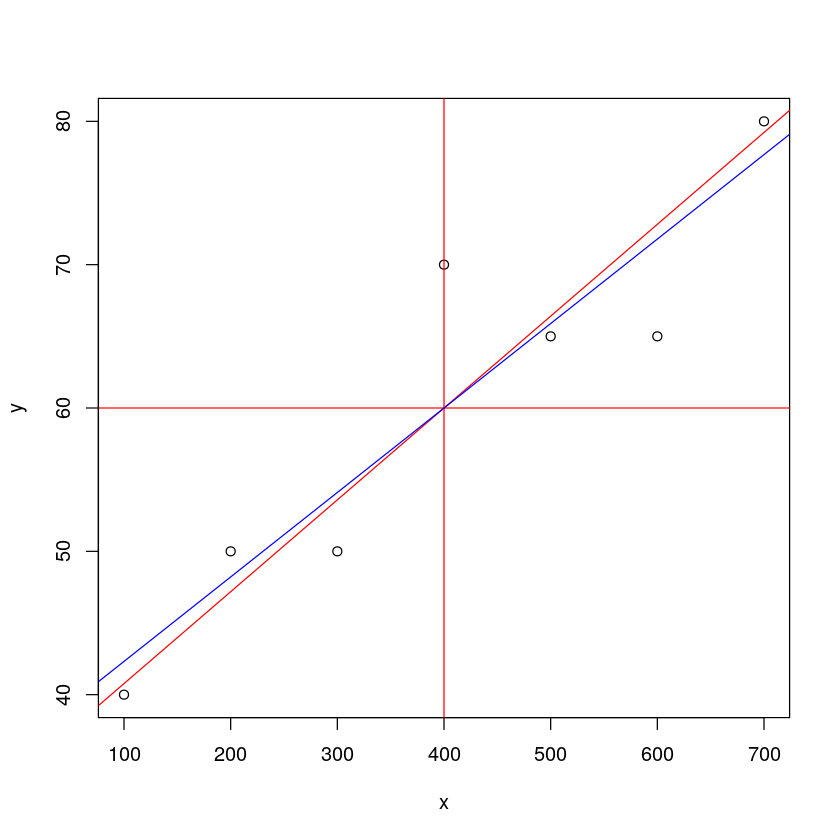

In [19]:
plot(x,y)
ptaves()
sdline()
regline()

## Coefficient of Determination: $R^{2}$

$y = \hat{y}+\hat{e}$

where $\hat{y}$ is the orthogonal projection of
$y$ onto the Column Space of the design matrix $X$.

Thus,

$\mbox{cov}(y,\hat{y}) = \mbox{cov}(\hat{y}+\hat{e},\hat{y}) = \mbox{var}(\hat{y})$

and we obtain,

$R = \mbox{cor}(y,\hat{y}) = \sqrt{\frac{\mbox{var}(\hat{y})}{\mbox{var}(y)}}$.

In other words: 

The proportion of the variance explained by the regression

equals the square of the correlation between 

the observed $y$ and the predicted $\hat{y}$.

## Signal to Noise ratio: S/N

$S/N = \frac{\mbox{var}(\hat{y})}{\mbox{var}(\hat{e})}$

Dividing numerator and denominator by $\mbox{var}(y)$ we get,

$S/N = \frac{R^{2}}{1-R^2}$

## In Simple Regression: $R = | \mbox{cor}(x,y) | $

$\mbox{var}(\hat{y}) = \mbox{var}(\hat{a}+\hat{b} x) = r^{2} \mbox{var}(y)$

Notice that $x,y,\hat{y}$ are $n$-column vectors but
$\hat{a},\hat{b}$ are scalars. The var, cov, cor, here and above
are the sample versions computed under the so called empirical distribution,
i.e. think of $y$ as the statistical variable that takes the value $y_{i}$
with probability $1/n$ so that, for example, $\mbox{var}(x) = (1/n)\sum (x_{i}-\bar{x})^{2}$.
Hence,

$R = \sqrt{r^{2}} = |r|$.

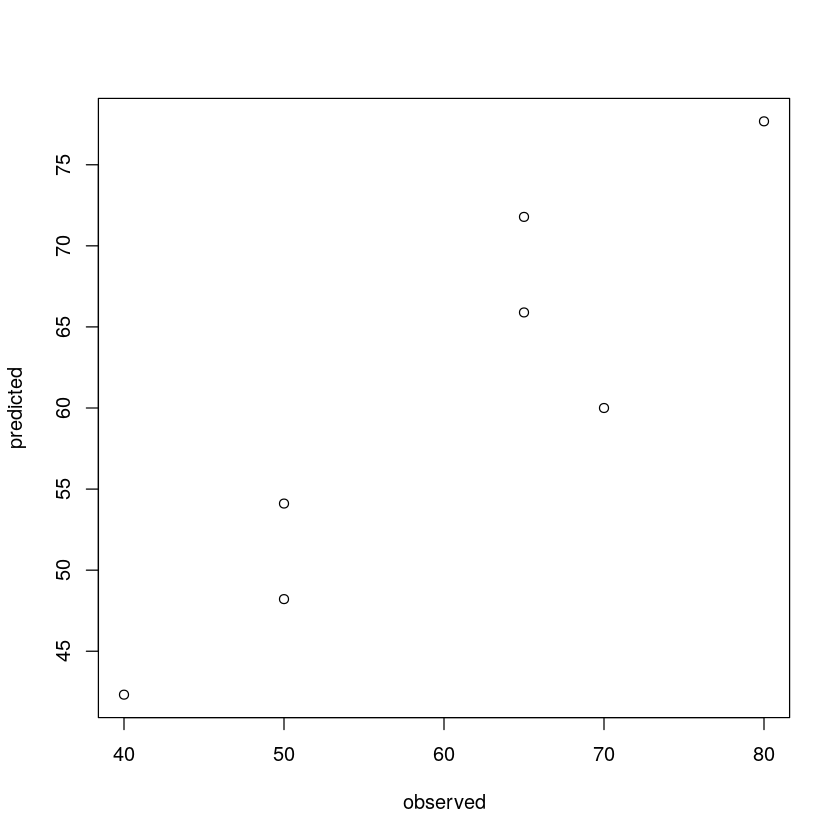

In [21]:
observed <- df$yield
predicted <- df$p
plot(observed,predicted)

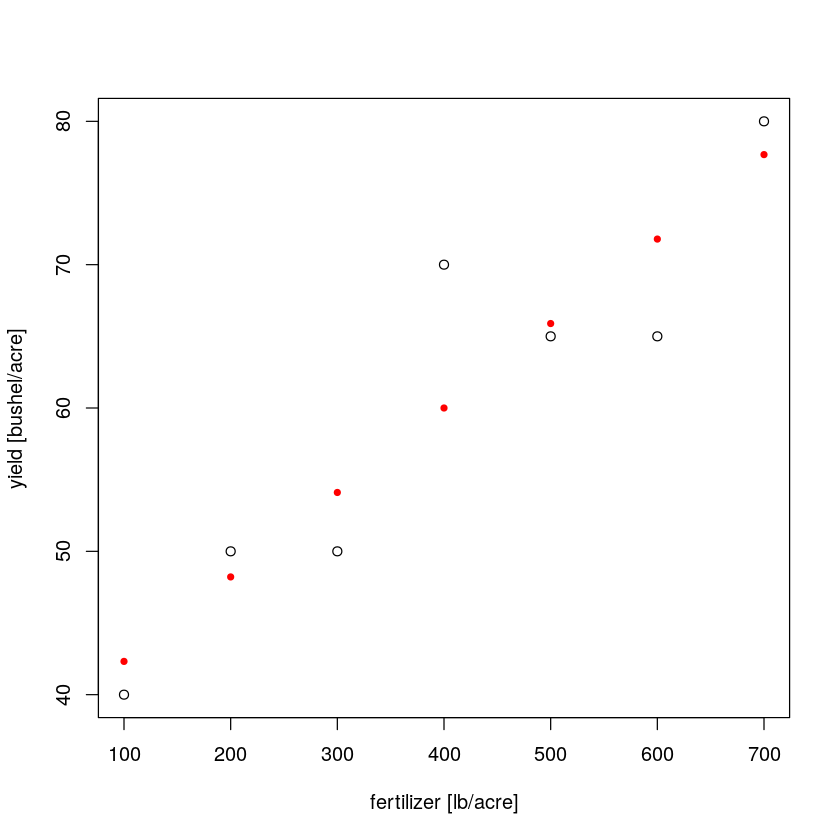

In [23]:
plot(df[,1:2])
points(df$f,df$p,col='red',pch=20)
